# PLE01: *__Myocardial Infraction Complications__*

@0xGeN02

Manuel Mateo Delgado-Gambino López

### Imports


In [47]:
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler


# 0. Import DataSet 

In [18]:
# fetch dataset 
myocardial_infarction_complications = fetch_ucirepo(id=579) 
  
# data (as pandas dataframes) 
X = myocardial_infarction_complications.data.features 
y = myocardial_infarction_complications.data.targets 


df = pd.concat([X, y], axis=1)

# metadata 
print("Metadata:")
print(myocardial_infarction_complications.metadata) 
  
# variable information 
print("\nVariable Information:")
print(myocardial_infarction_complications.variables)

# Obtener todas las variables (columnas) del DataFrame X
variables = X.columns.tolist()
print("\nTodas las Variables:")
print(variables)

Metadata:
{'uci_id': 579, 'name': 'Myocardial infarction complications', 'repository_url': 'https://archive.ics.uci.edu/dataset/579/myocardial+infarction+complications', 'data_url': 'https://archive.ics.uci.edu/static/public/579/data.csv', 'abstract': 'Prediction of myocardial infarction complications', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1700, 'num_features': 111, 'feature_types': ['Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK', 'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS'], 'index_col': ['ID'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C53P5M', 'creators': ['S.E. Golovenkin', 'V.A. Shulman', 'D.A. Rossiev', 'P.A. Shesternya', 'S.Yu. Nikulina', 'Yu.V. Orlova', 'V.F. Voino-Yasenetsky'], 'intro_pap

## 0.1 Convert to CSV

In [53]:
X.to_csv('data/myocardial_infarction_complications_features.csv', index=False)
y.to_csv('data/myocardial_infarction_complications_targets.csv', index=False)


# 1. Informacion General

In [4]:
# Información general del DataFrame de características
print('Caracteristicas')
print(X.info())

# Descripción estadística del DataFrame de características
print(X.describe())
print()
# Información general del DataFrame de etiquetas
print('Etiquetas')
print(y.info())

# Descripción estadística del DataFrame de etiquetas
print(y.describe())
print()
# Mostrar los tipos de variables en las características
print('VarTypes')
print(X.dtypes)
print()


# Información general
print("Dimensiones del dataFrame:", X.shape)
individuos = X.shape[0]
print("Cantidad de individuos:", individuos)

# Datos del dataFrame
print("Encabezado del dataFrame:")
print(X.head())

print("Estadísticas descriptivas:")
print(X.describe())

# Datos faltantes
print("Datos faltantes:")
print(X.isnull().sum())

# Datos duplicados
print("Datos duplicados:")
print(X.duplicated().sum())

# Datos únicos
print("Datos únicos:")
print(X.nunique())

Caracteristicas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 111 entries, AGE to TRENT_S_n
dtypes: float64(110), int64(1)
memory usage: 1.4 MB
None
               AGE          SEX     INF_ANAM    STENOK_AN    FK_STENOK  \
count  1692.000000  1700.000000  1696.000000  1594.000000  1627.000000   
mean     61.856974     0.626471     0.554835     2.316186     1.205286   
std      11.259936     0.483883     0.836801     2.440586     1.040814   
min      26.000000     0.000000     0.000000     0.000000     0.000000   
25%      54.000000     0.000000     0.000000     0.000000     0.000000   
50%      63.000000     1.000000     0.000000     1.000000     2.000000   
75%      70.000000     1.000000     1.000000     5.000000     2.000000   
max      92.000000     1.000000     3.000000     6.000000     4.000000   

          IBS_POST  IBS_NASL           GB   SIM_GIPERT      DLIT_AG  ...  \
count  1649.000000  72.00000  1691.000000  1692.000000  1452.000000  ..

## 1.1 VarTypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 111 entries, AGE to TRENT_S_n
dtypes: float64(110), int64(1)
memory usage: 1.4 MB
None
               AGE          SEX     INF_ANAM    STENOK_AN    FK_STENOK  \
count  1692.000000  1700.000000  1696.000000  1594.000000  1627.000000   
mean     61.856974     0.626471     0.554835     2.316186     1.205286   
std      11.259936     0.483883     0.836801     2.440586     1.040814   
min      26.000000     0.000000     0.000000     0.000000     0.000000   
25%      54.000000     0.000000     0.000000     0.000000     0.000000   
50%      63.000000     1.000000     0.000000     1.000000     2.000000   
75%      70.000000     1.000000     1.000000     5.000000     2.000000   
max      92.000000     1.000000     3.000000     6.000000     4.000000   

          IBS_POST  IBS_NASL           GB   SIM_GIPERT      DLIT_AG  ...  \
count  1649.000000  72.00000  1691.000000  1692.000000  1452.000000  ...   
mean      1

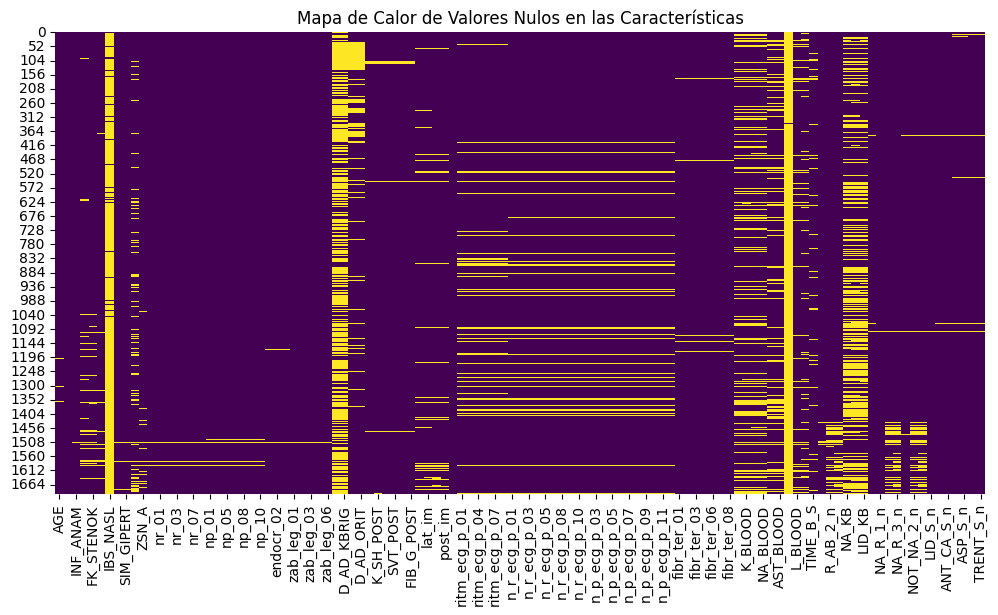

In [5]:
# Información general del DataFrame de características
print(X.info())

# Descripción estadística del DataFrame de características
print(X.describe())

# Información general del DataFrame de etiquetas
print(y.info())

# Descripción estadística del DataFrame de etiquetas
print(y.describe())

# Visualización de valores nulos en las características
plt.figure(figsize=(12, 6))
sns.heatmap(X.isnull(), cbar=False, cmap='viridis')
plt.title('Mapa de Calor de Valores Nulos en las Características')
plt.show()

### 1.2 Valores Atipicos

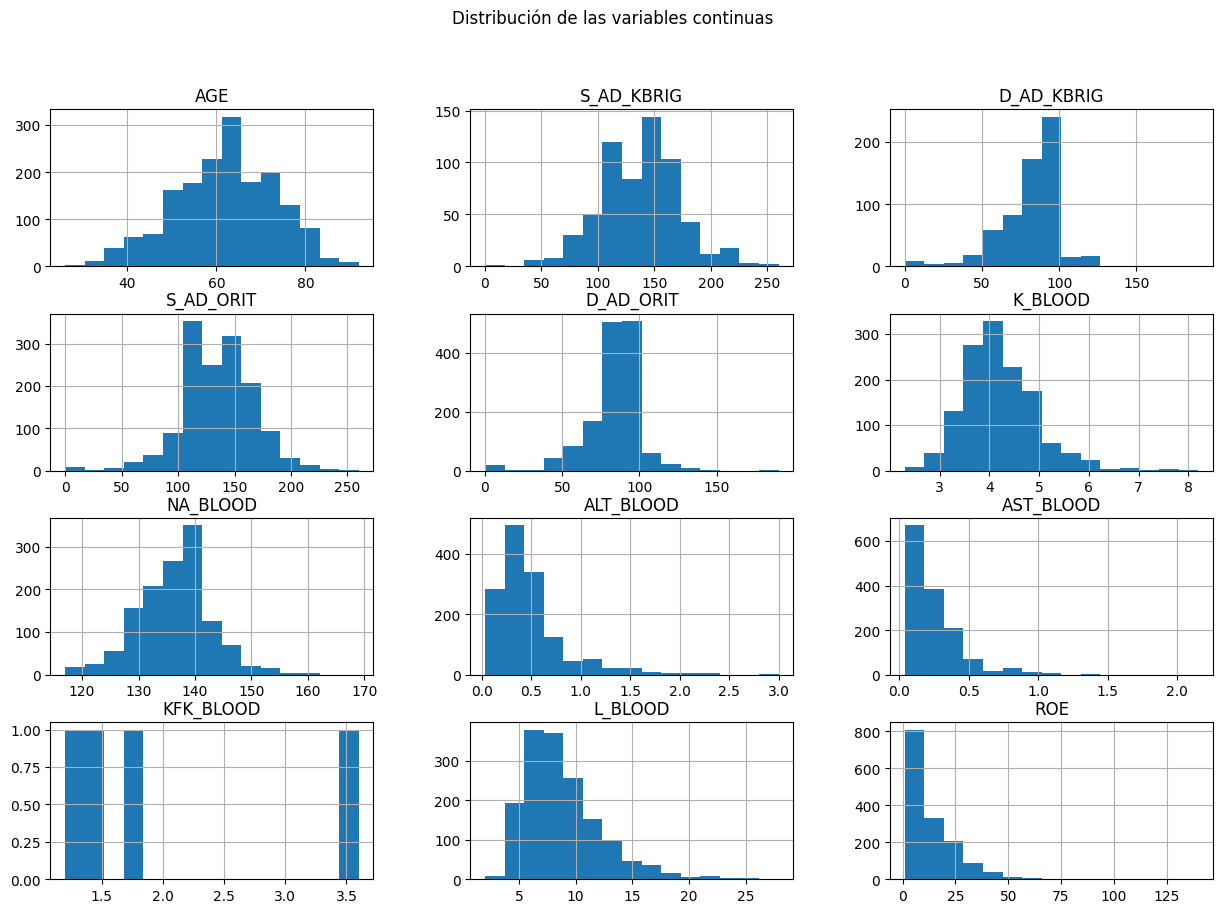

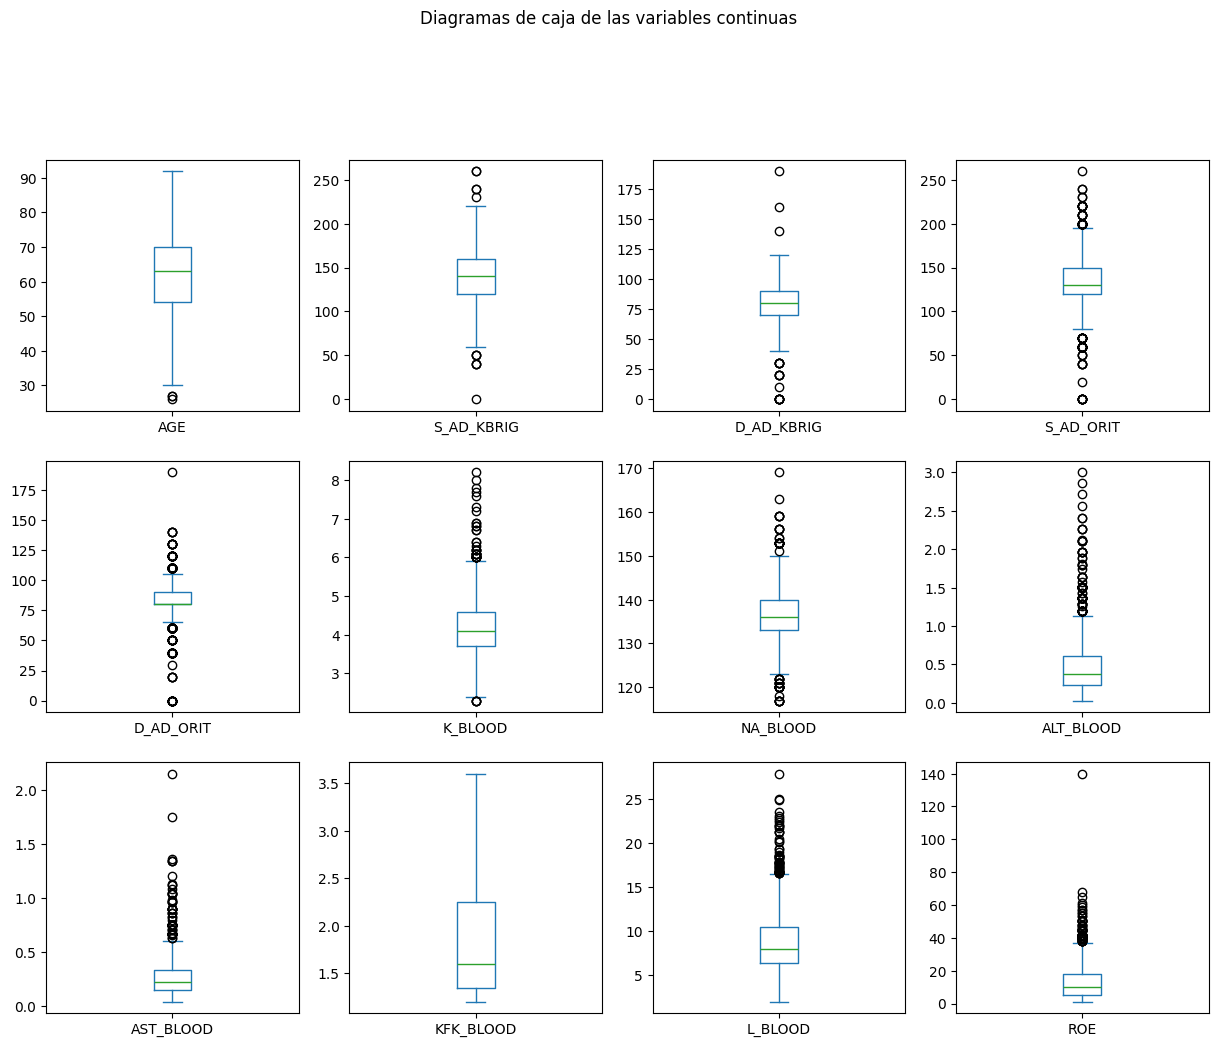

C:\Users\G513\AppData\Local\Temp\ipykernel_67064\675847843.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, palette="viridis")


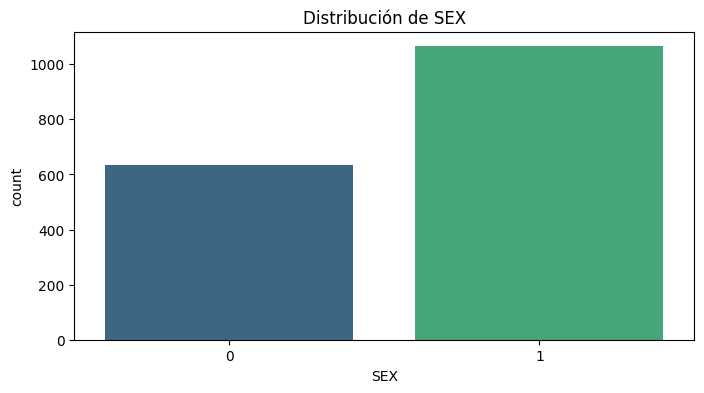

C:\Users\G513\AppData\Local\Temp\ipykernel_67064\675847843.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, palette="viridis")


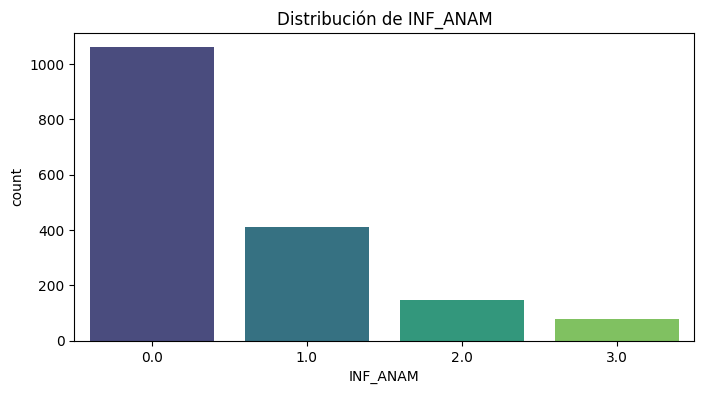

C:\Users\G513\AppData\Local\Temp\ipykernel_67064\675847843.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, palette="viridis")


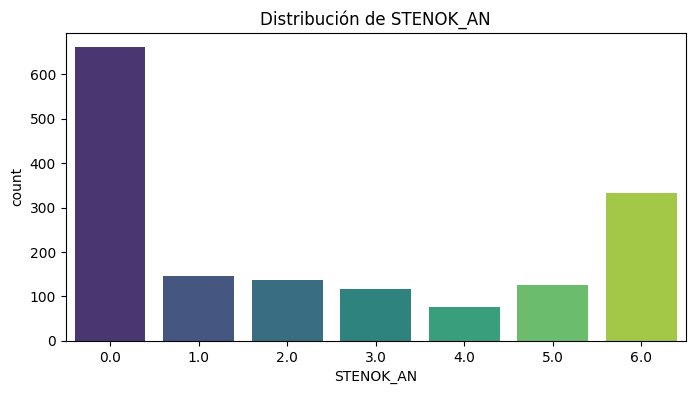

C:\Users\G513\AppData\Local\Temp\ipykernel_67064\675847843.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, palette="viridis")


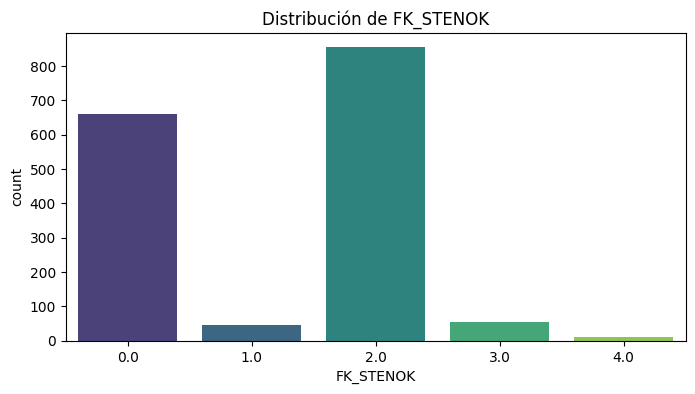

C:\Users\G513\AppData\Local\Temp\ipykernel_67064\675847843.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, palette="viridis")


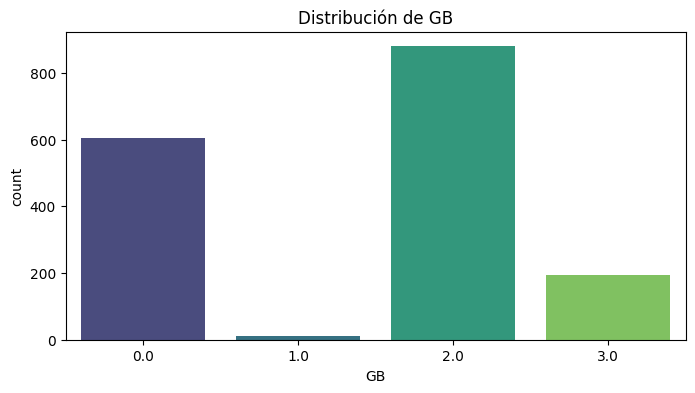

C:\Users\G513\AppData\Local\Temp\ipykernel_67064\675847843.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, palette="viridis")


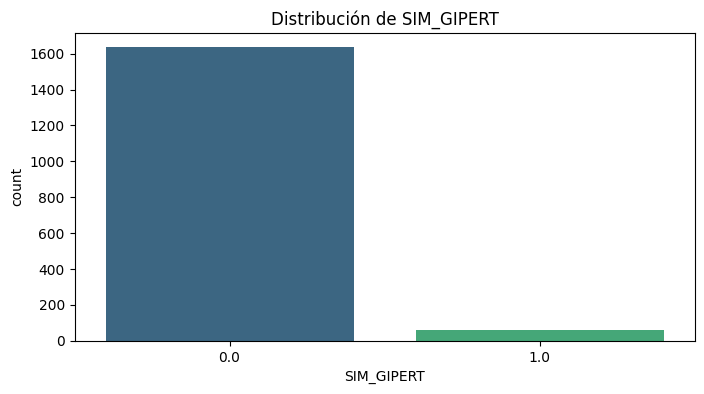

C:\Users\G513\AppData\Local\Temp\ipykernel_67064\675847843.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, palette="viridis")


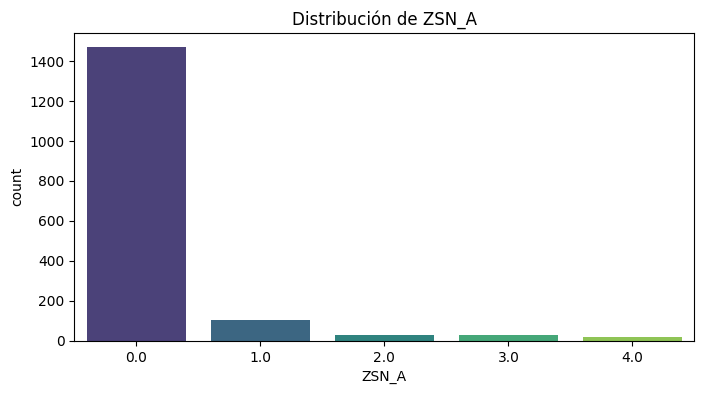

C:\Users\G513\AppData\Local\Temp\ipykernel_67064\675847843.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, palette="viridis")


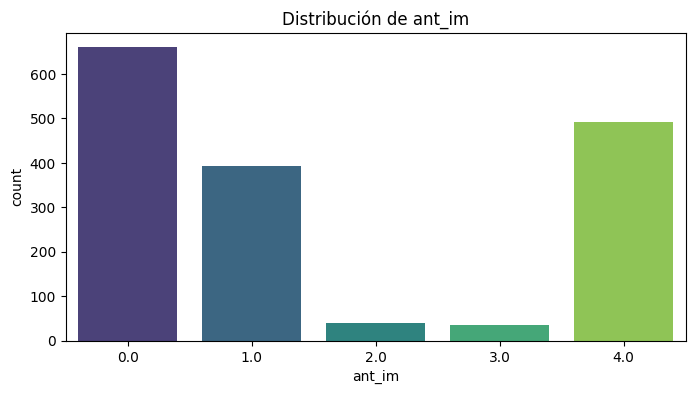

C:\Users\G513\AppData\Local\Temp\ipykernel_67064\675847843.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, palette="viridis")


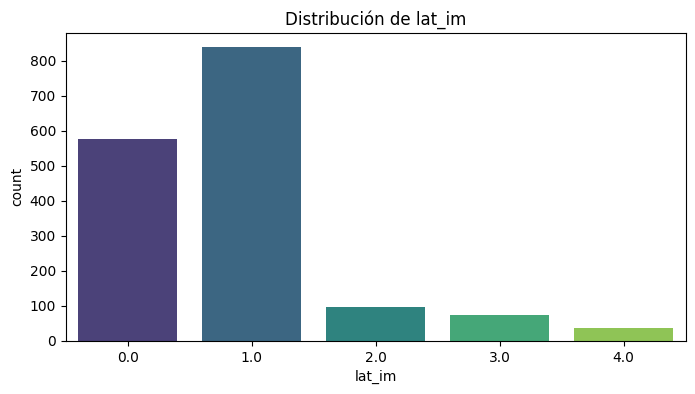

C:\Users\G513\AppData\Local\Temp\ipykernel_67064\675847843.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, palette="viridis")


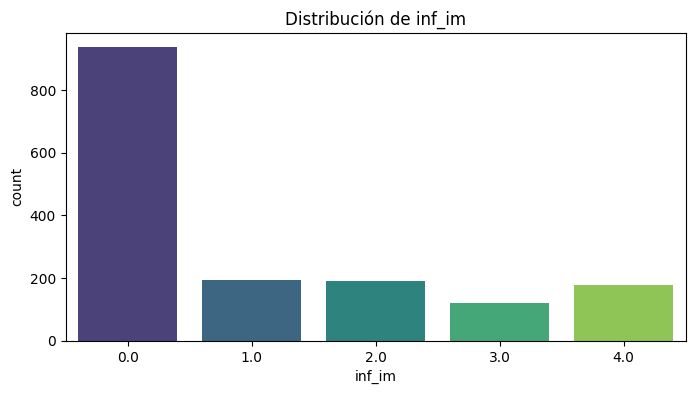

C:\Users\G513\AppData\Local\Temp\ipykernel_67064\675847843.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, palette="viridis")


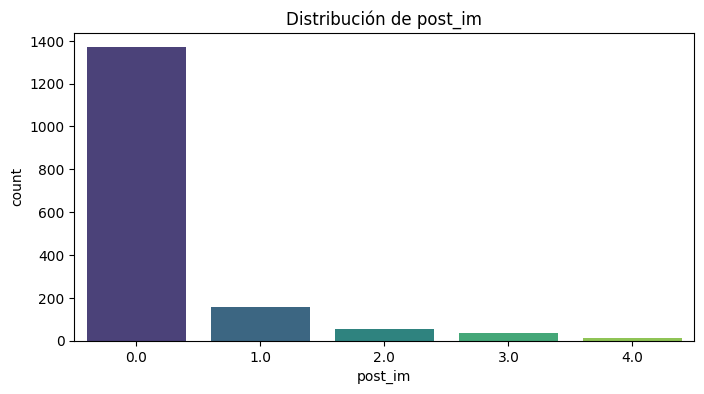

C:\Users\G513\AppData\Local\Temp\ipykernel_67064\675847843.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=var, data=df, palette="viridis")


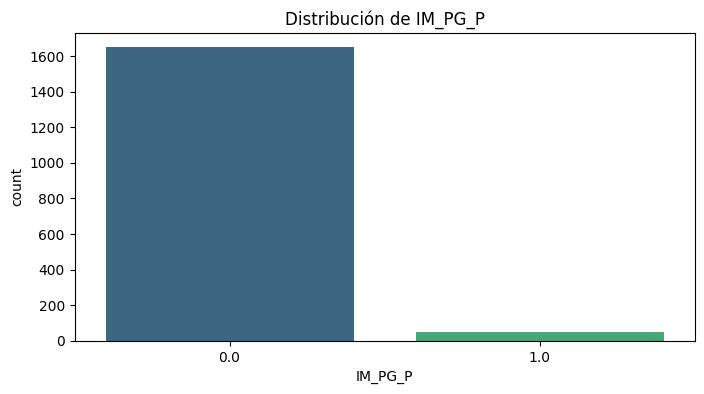

In [6]:
# 3. Distribución de las variables
# Variables continuas
continuous_vars = ['AGE', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT', 'D_AD_ORIT', 'K_BLOOD', 'NA_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'KFK_BLOOD', 'L_BLOOD', 'ROE']

# Variables discretas (las categóricas o de conteo)
discrete_vars = ['SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK', 'GB', 'SIM_GIPERT', 'ZSN_A', 'ant_im', 'lat_im', 'inf_im', 'post_im', 'IM_PG_P']

# Histograma para variables continuas
df[continuous_vars].hist(bins=15, figsize=(15, 10))
plt.suptitle('Distribución de las variables continuas')
plt.show()

# Diagrama de caja para variables continuas
df[continuous_vars].plot(kind='box', subplots=True, layout=(4, 4), figsize=(15, 15), sharex=False, sharey=False)
plt.suptitle('Diagramas de caja de las variables continuas')
plt.show()

# Gráficos de barras para variables discretas
for var in discrete_vars:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=var, data=df, palette="viridis")
    plt.title(f'Distribución de {var}')
    plt.show()



## 4. Relaciones entre variables

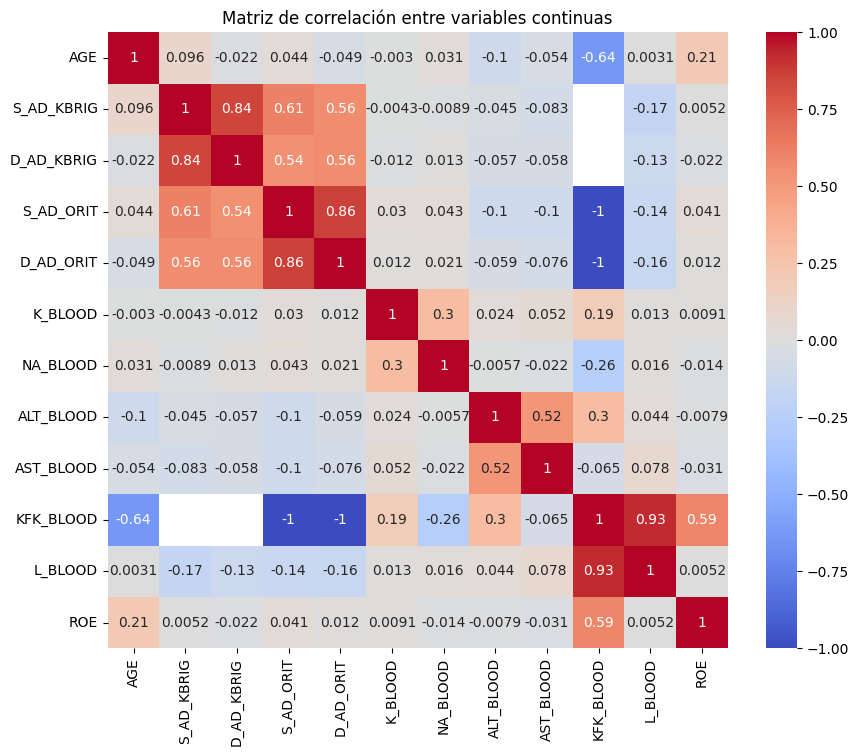

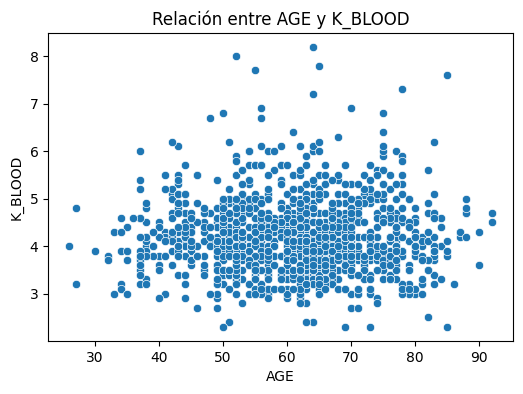

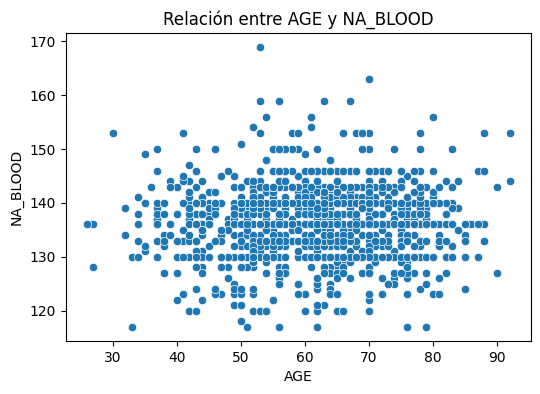

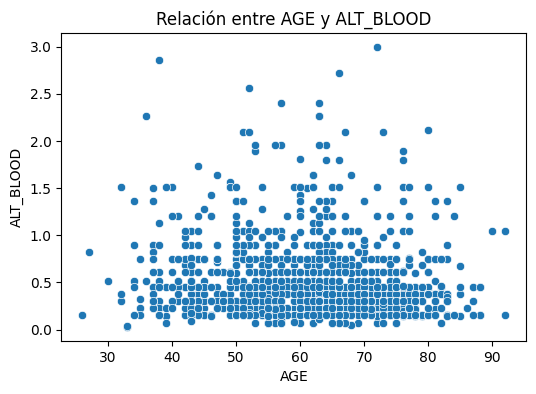


Pares de variables con correlación significativa:
L_BLOOD     KFK_BLOOD     0.926228
KFK_BLOOD   L_BLOOD       0.926228
S_AD_ORIT   D_AD_ORIT     0.861266
D_AD_ORIT   S_AD_ORIT     0.861266
S_AD_KBRIG  D_AD_KBRIG    0.844144
D_AD_KBRIG  S_AD_KBRIG    0.844144
S_AD_ORIT   S_AD_KBRIG    0.611365
S_AD_KBRIG  S_AD_ORIT     0.611365
KFK_BLOOD   ROE           0.590041
ROE         KFK_BLOOD     0.590041
D_AD_ORIT   D_AD_KBRIG    0.555960
D_AD_KBRIG  D_AD_ORIT     0.555960
D_AD_ORIT   S_AD_KBRIG    0.555501
S_AD_KBRIG  D_AD_ORIT     0.555501
D_AD_KBRIG  S_AD_ORIT     0.543048
S_AD_ORIT   D_AD_KBRIG    0.543048
ALT_BLOOD   AST_BLOOD     0.519449
AST_BLOOD   ALT_BLOOD     0.519449
AGE         KFK_BLOOD    -0.636265
KFK_BLOOD   AGE          -0.636265
D_AD_ORIT   KFK_BLOOD    -1.000000
S_AD_ORIT   KFK_BLOOD    -1.000000
KFK_BLOOD   S_AD_ORIT    -1.000000
            D_AD_ORIT    -1.000000
dtype: float64


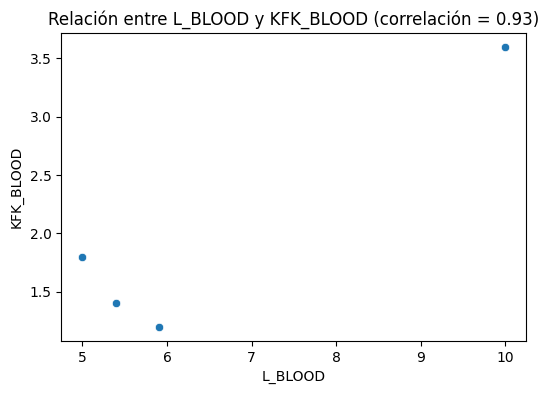

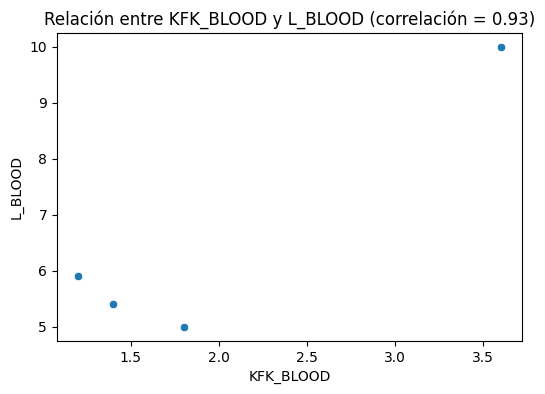

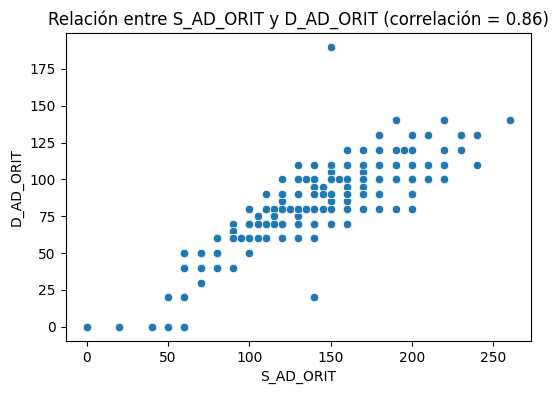

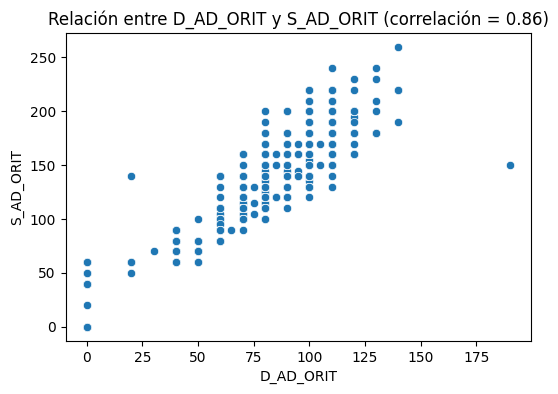

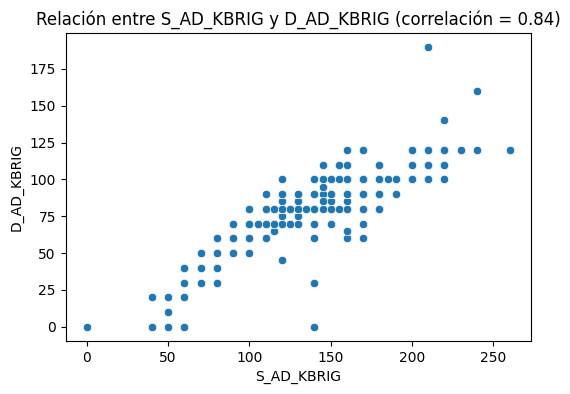

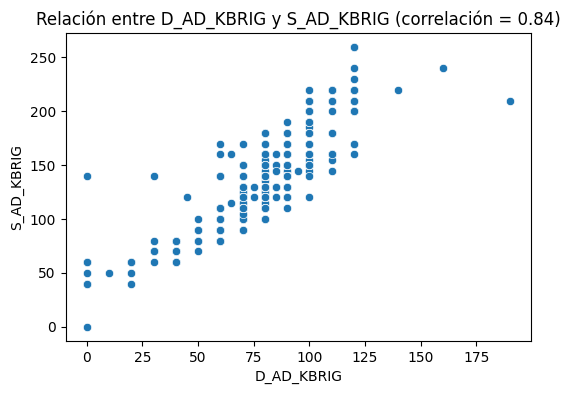

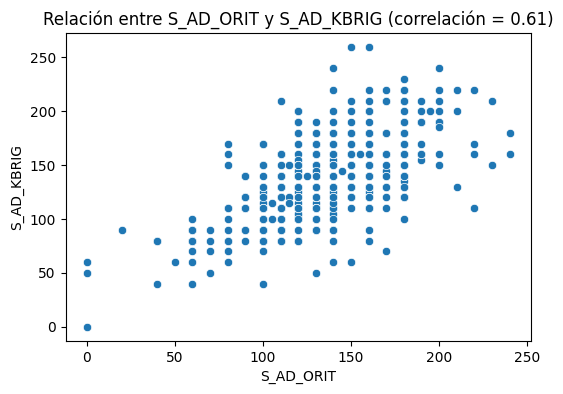

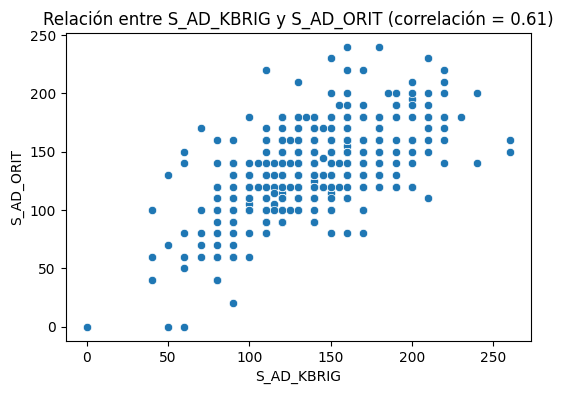

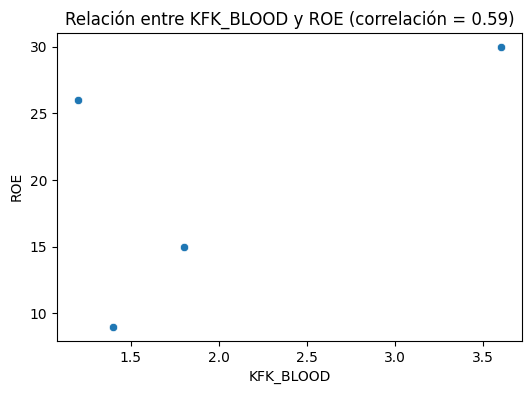

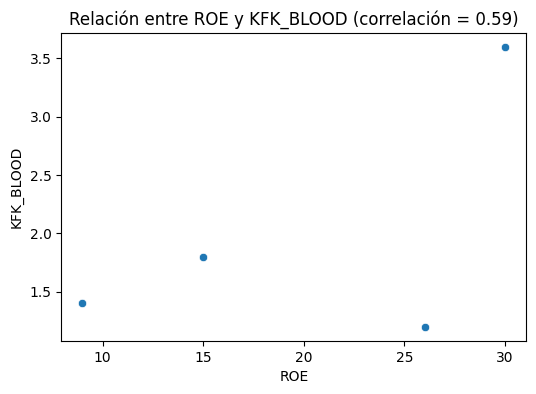

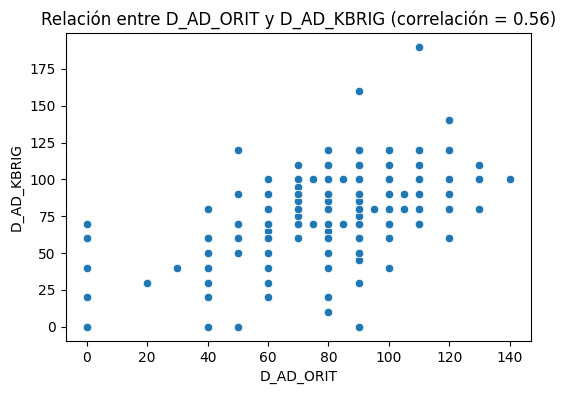

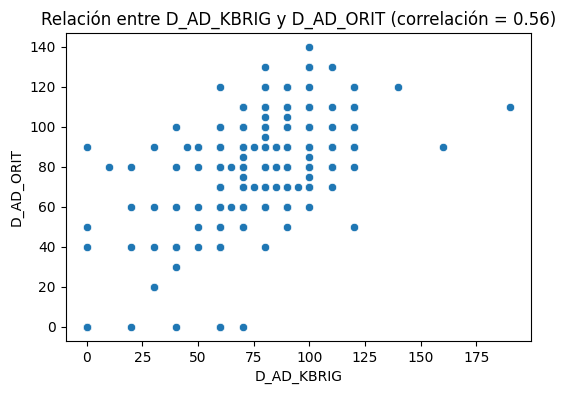

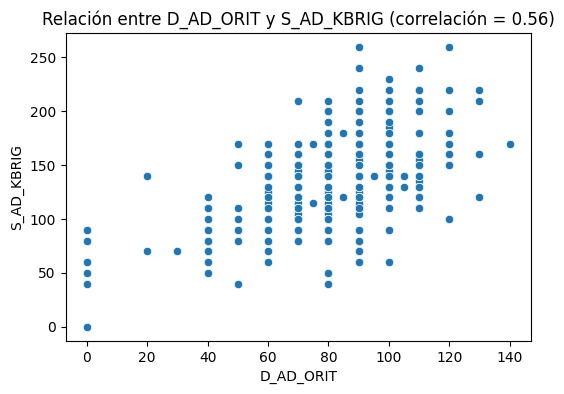

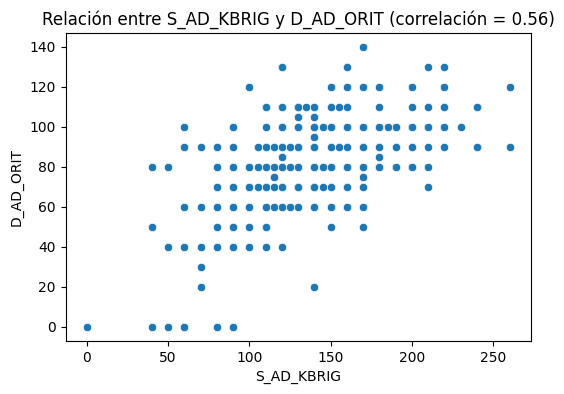

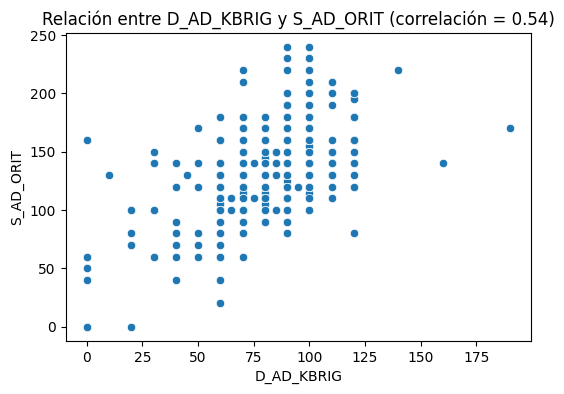

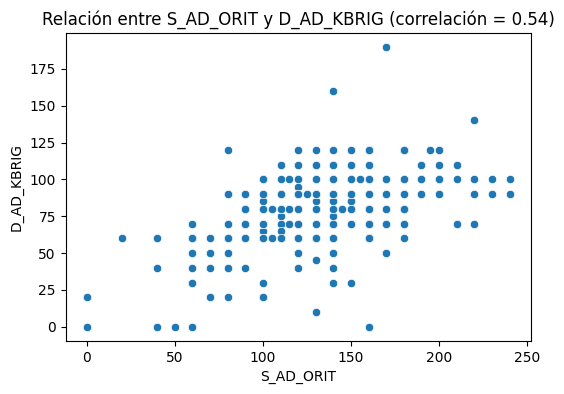

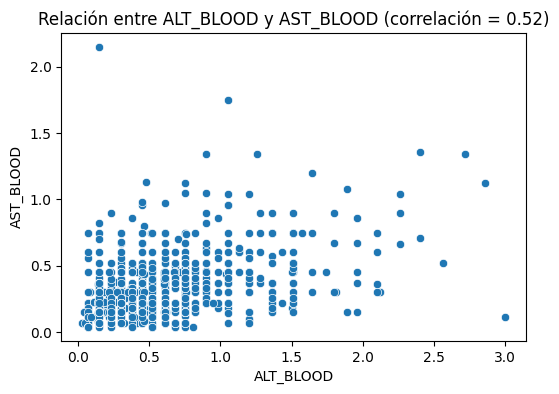

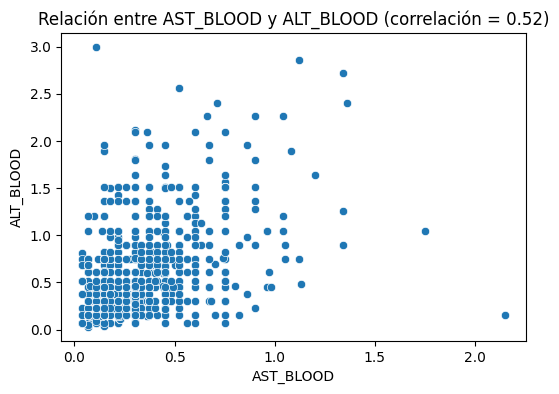

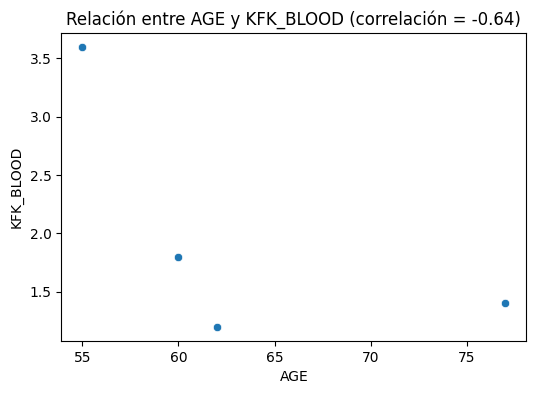

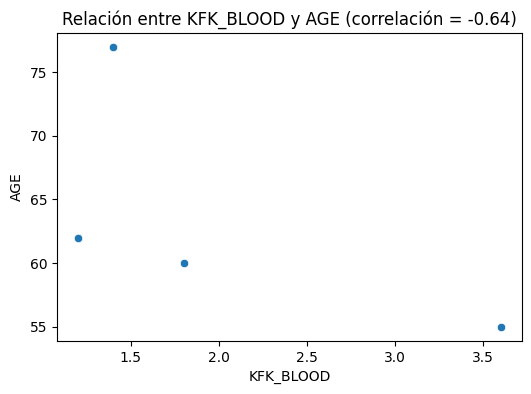

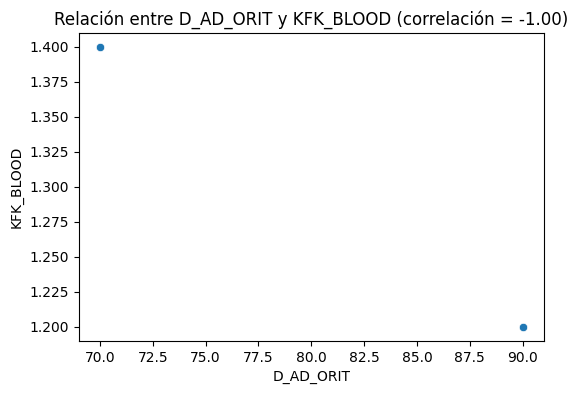

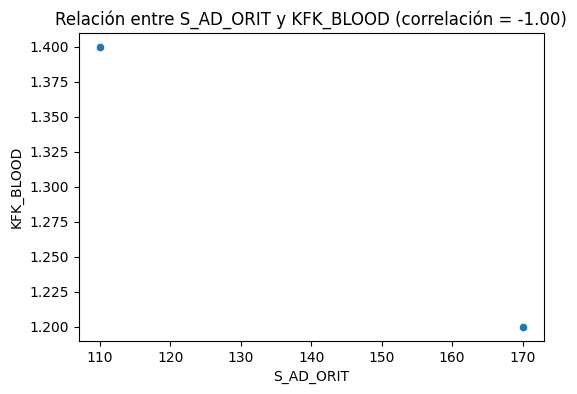

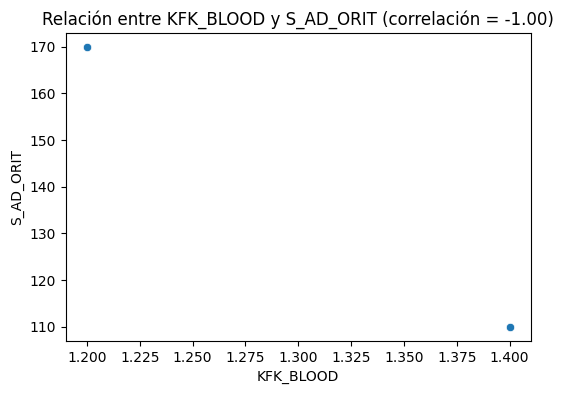

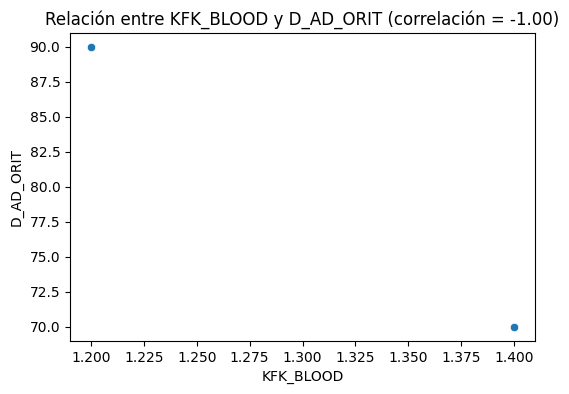

In [7]:
# 4. Relaciones entre variables
# Matriz de correlación
corr_matrix = df[continuous_vars].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación entre variables continuas')
plt.show()

# Diagrama de dispersión entre algunas variables continuas y la edad
for var in ['K_BLOOD', 'NA_BLOOD', 'ALT_BLOOD']:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x='AGE', y=var, data=df)
    plt.title(f'Relación entre AGE y {var}')
    plt.show()

# Filtro para pares de variables con una correlación significativa (mayor a 0.5 o menor a -0.5)
threshold = 0.5
corr_pairs = corr_matrix.unstack().sort_values(ascending=False)
high_corr_pairs = corr_pairs[(corr_pairs > threshold) & (corr_pairs < 1) | (corr_pairs < -threshold)]

print("\nPares de variables con correlación significativa:")
print(high_corr_pairs)

# Diagrama de dispersión para las parejas de variables con correlación significativa
for (var1, var2), corr_value in high_corr_pairs.items():
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=var1, y=var2, data=df)
    plt.title(f'Relación entre {var1} y {var2} (correlación = {corr_value:.2f})')
    plt.show()


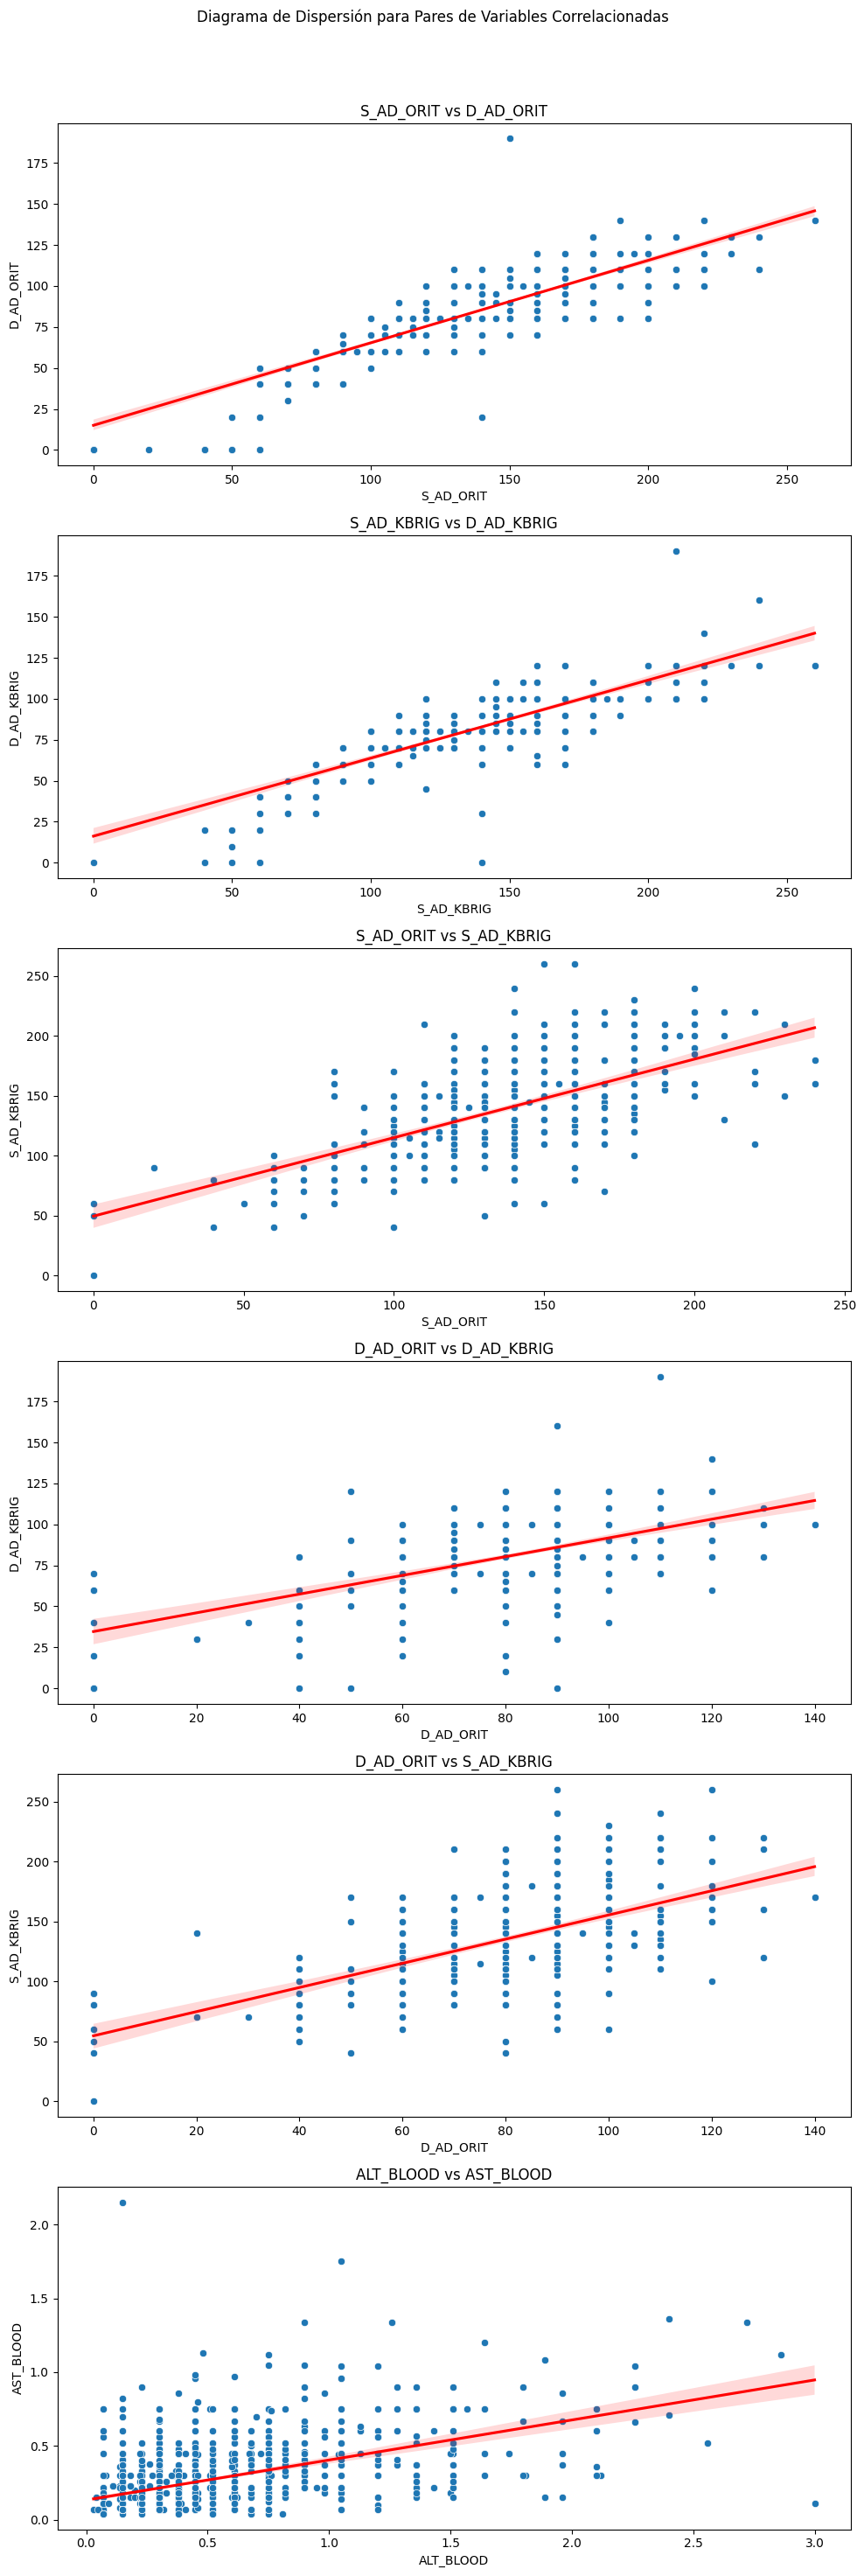

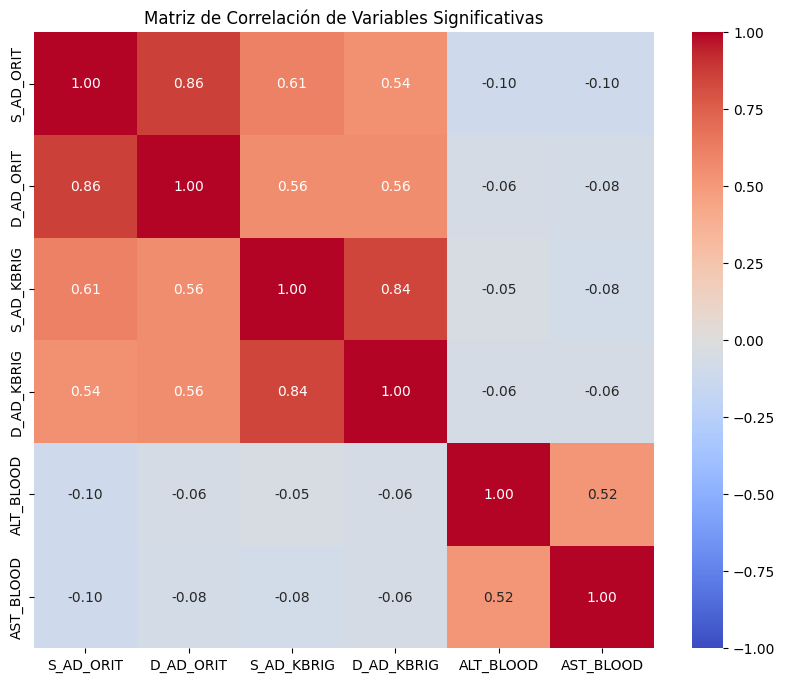

In [8]:
# Pares de variables con correlación significativa
pairs = [
    ('S_AD_ORIT', 'D_AD_ORIT'),
    ('S_AD_KBRIG', 'D_AD_KBRIG'),
    ('S_AD_ORIT', 'S_AD_KBRIG'),
    ('D_AD_ORIT', 'D_AD_KBRIG'),
    ('D_AD_ORIT', 'S_AD_KBRIG'),
    ('ALT_BLOOD', 'AST_BLOOD')
]

# Crear una figura para los diagramas de dispersión
fig, axes = plt.subplots(nrows=len(pairs), ncols=1, figsize=(10, 5 * len(pairs)))
fig.suptitle('Diagrama de Dispersión para Pares de Variables Correlacionadas')

for i, (var1, var2) in enumerate(pairs):
    sns.scatterplot(data=df, x=var1, y=var2, ax=axes[i])
    axes[i].set_title(f'{var1} vs {var2}')
    sns.regplot(data=df, x=var1, y=var2, ax=axes[i], scatter=False, color='red')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Crear una matriz de correlación
correlation_matrix = df[['S_AD_ORIT', 'D_AD_ORIT', 'S_AD_KBRIG', 'D_AD_KBRIG', 'ALT_BLOOD', 'AST_BLOOD']].corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Matriz de Correlación de Variables Significativas')
plt.show()

## 5.0 Analisis de Null Values


Valores perdidos en el dataset:
AGE            8
SEX            0
INF_ANAM       4
STENOK_AN    106
FK_STENOK     73
            ... 
DRESSLER       0
ZSN            0
REC_IM         0
P_IM_STEN      0
LET_IS         0
Length: 123, dtype: int64


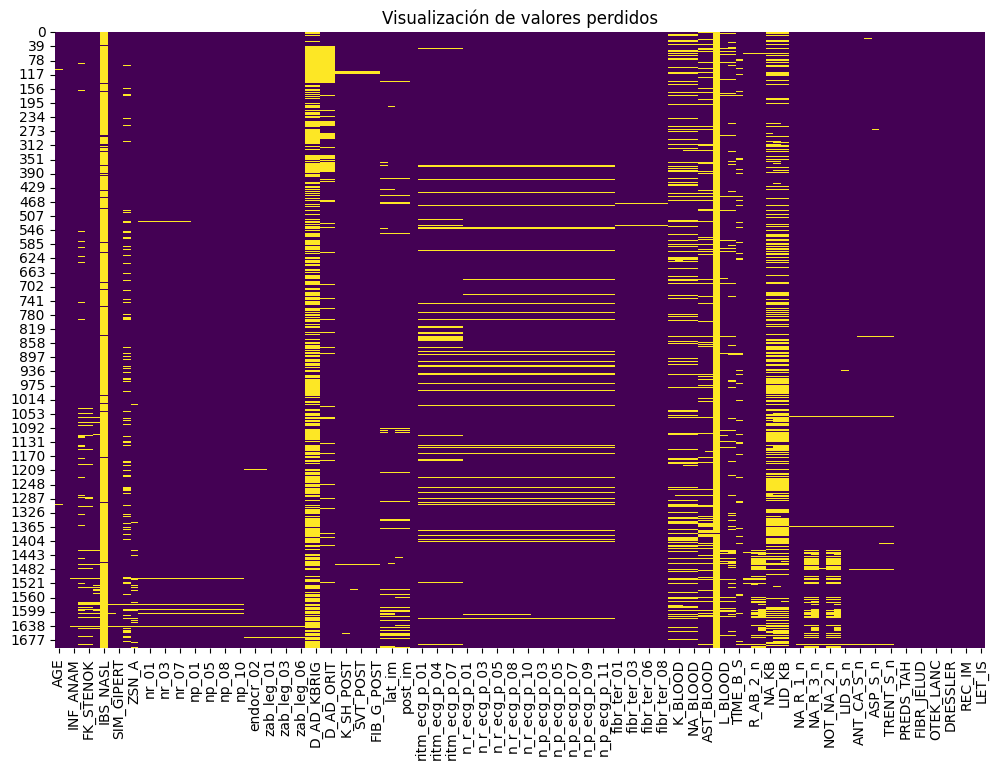

C:\Users\G513\AppData\Local\Temp\ipykernel_67064\1264925054.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[var].fillna(mode_val, inplace=True)  # Rellena los valores perdidos con la moda


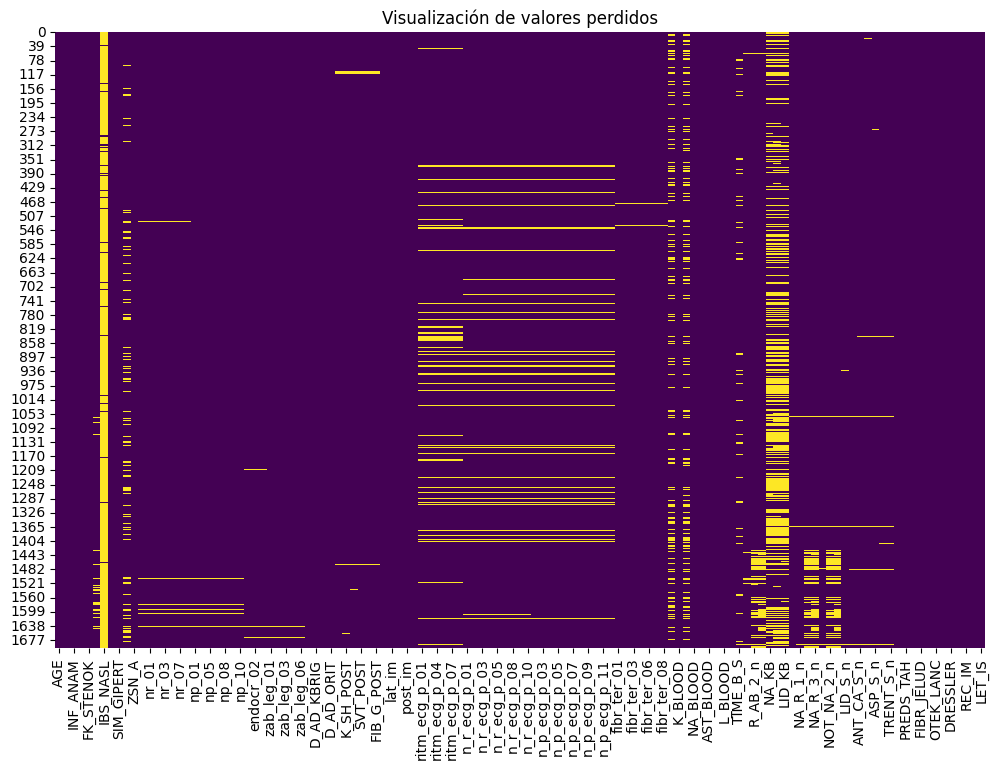


Cantidad de valores perdidos en el dataset después del arreglo:
AGE          0
SEX          0
INF_ANAM     0
STENOK_AN    0
FK_STENOK    0
            ..
DRESSLER     0
ZSN          0
REC_IM       0
P_IM_STEN    0
LET_IS       0
Length: 123, dtype: int64


In [9]:
# 5. Análisis de valores perdidos
print("\nValores perdidos en el dataset:")
print(df.isnull().sum())

# Visualización de valores perdidos
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Visualización de valores perdidos')
plt.show()

# Imputación por la moda para las variables discretas
for var in discrete_vars:
    mode_val = df[var].mode()[0]  # Calcula la moda
    df[var].fillna(mode_val, inplace=True)  # Rellena los valores perdidos con la moda

# Estrategia para manejar valores nulos: Imput con la media para las variables continuas
df[continuous_vars] = df[continuous_vars].fillna(df[continuous_vars].mean())
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Visualización de valores perdidos')
plt.show()

print("\nCantidad de valores perdidos en el dataset después del arreglo:")
print(df.isnull().sum())


## 6.0 Analisis de valores atipicos

C:\Users\G513\AppData\Local\Temp\ipykernel_67064\4165714505.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[var], palette="Blues")


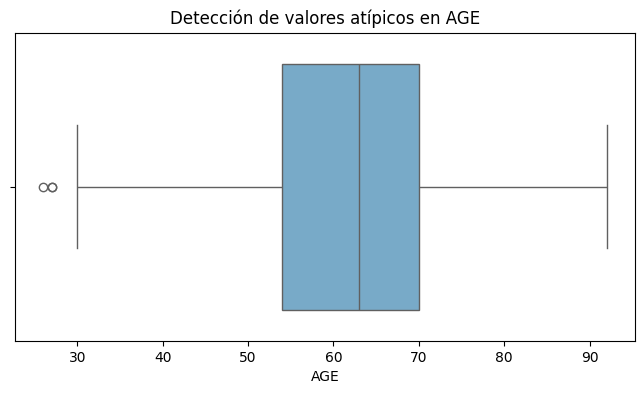

C:\Users\G513\AppData\Local\Temp\ipykernel_67064\4165714505.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[var], palette="Blues")


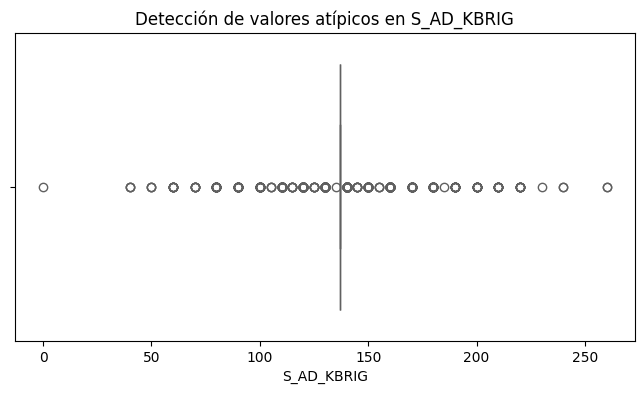

C:\Users\G513\AppData\Local\Temp\ipykernel_67064\4165714505.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[var], palette="Blues")


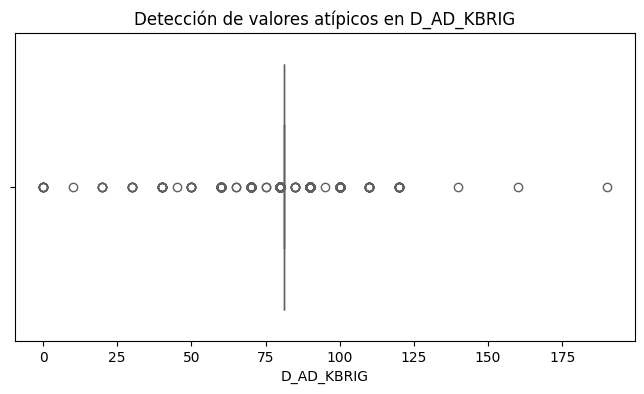

C:\Users\G513\AppData\Local\Temp\ipykernel_67064\4165714505.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[var], palette="Blues")


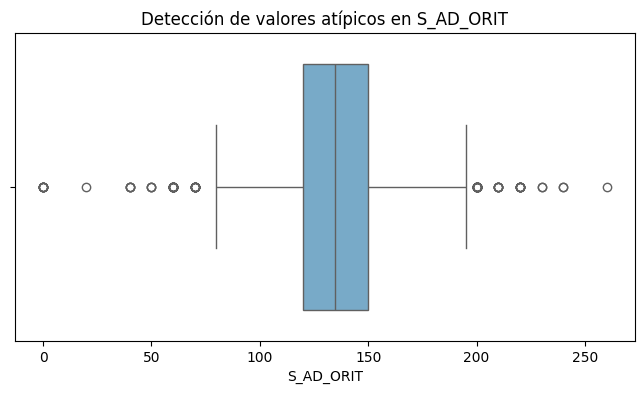

C:\Users\G513\AppData\Local\Temp\ipykernel_67064\4165714505.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[var], palette="Blues")


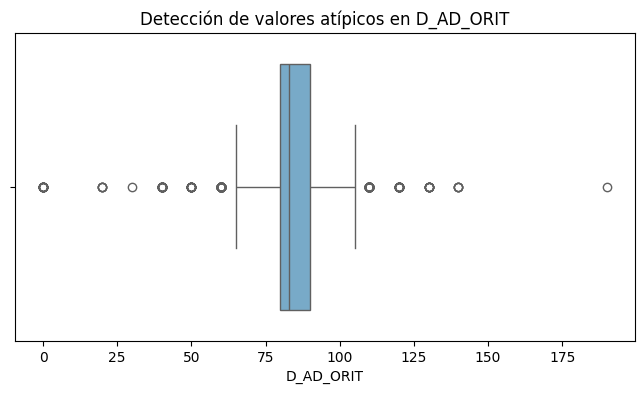

C:\Users\G513\AppData\Local\Temp\ipykernel_67064\4165714505.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[var], palette="Blues")


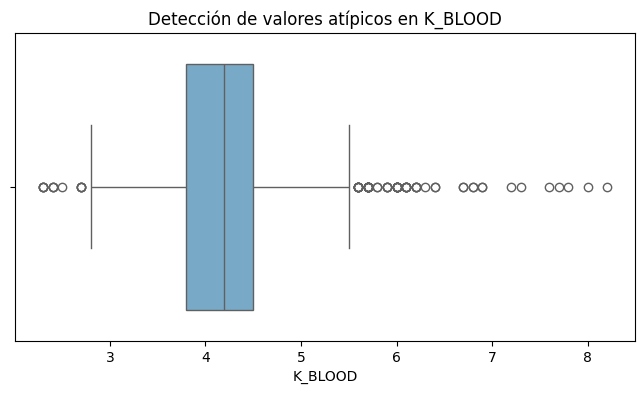

C:\Users\G513\AppData\Local\Temp\ipykernel_67064\4165714505.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[var], palette="Blues")


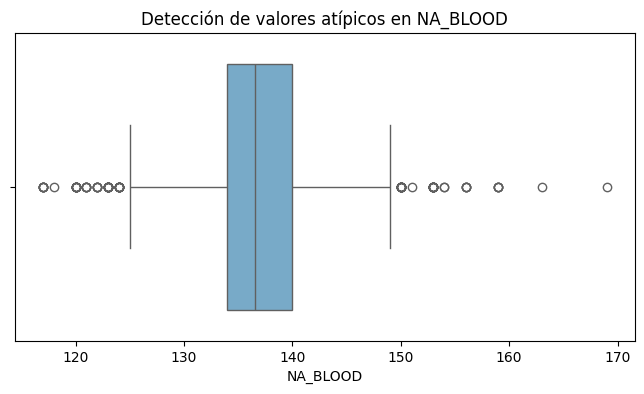

C:\Users\G513\AppData\Local\Temp\ipykernel_67064\4165714505.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[var], palette="Blues")


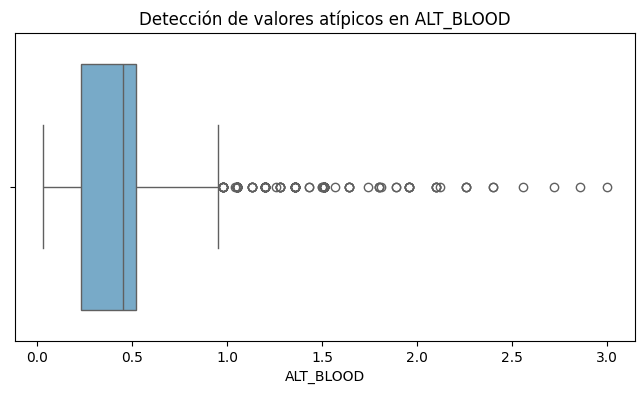

C:\Users\G513\AppData\Local\Temp\ipykernel_67064\4165714505.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[var], palette="Blues")


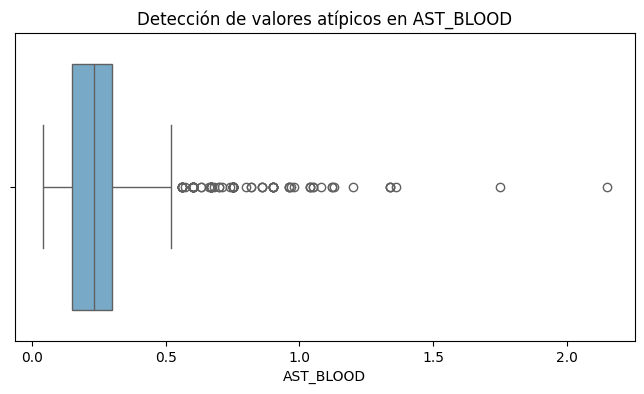

C:\Users\G513\AppData\Local\Temp\ipykernel_67064\4165714505.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[var], palette="Blues")


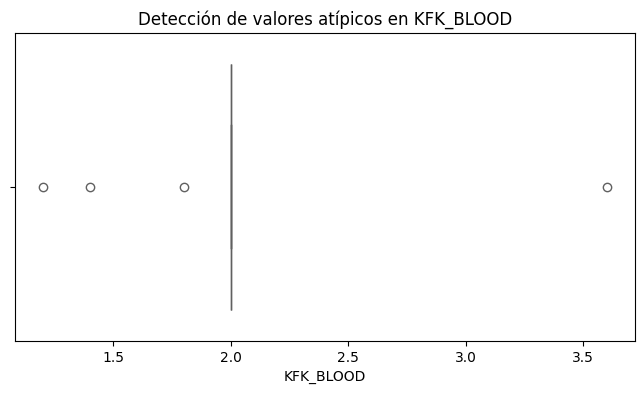

C:\Users\G513\AppData\Local\Temp\ipykernel_67064\4165714505.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[var], palette="Blues")


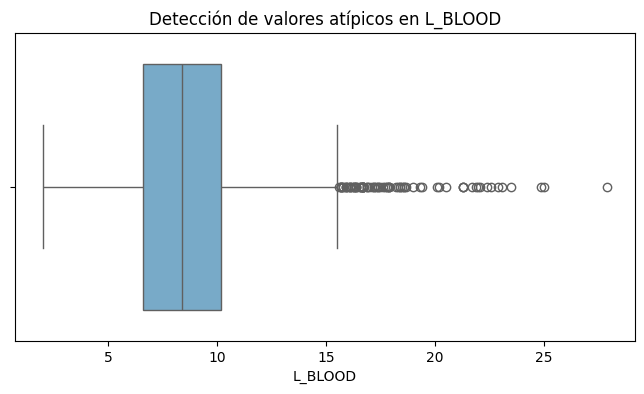

C:\Users\G513\AppData\Local\Temp\ipykernel_67064\4165714505.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[var], palette="Blues")


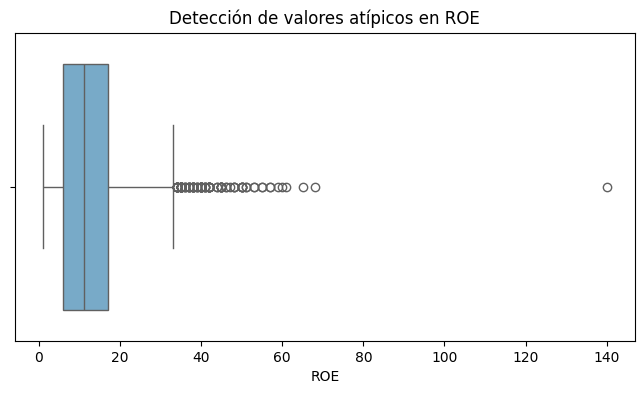

In [10]:
# 6. Análisis de valores atípicos
for var in continuous_vars:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[var], palette="Blues")
    plt.title(f'Detección de valores atípicos en {var}')
    plt.show()

# Estrategia para manejar valores atípicos: Truncado de valores extremos
for var in continuous_vars:
    q1 = df[var].quantile(0.25)
    q3 = df[var].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[var] = np.clip(df[var], lower_bound, upper_bound)

## 7.0 Analisis de variable objetivo

### 7.1 Analisis de infartos, recaidas y no recaidas("curas")

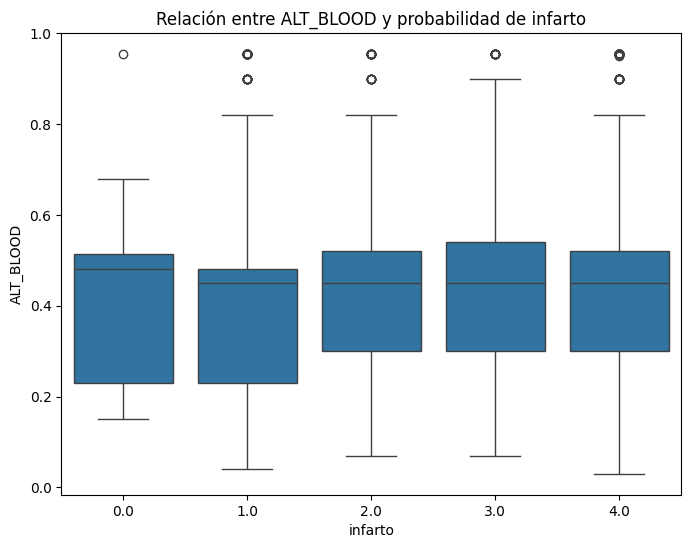

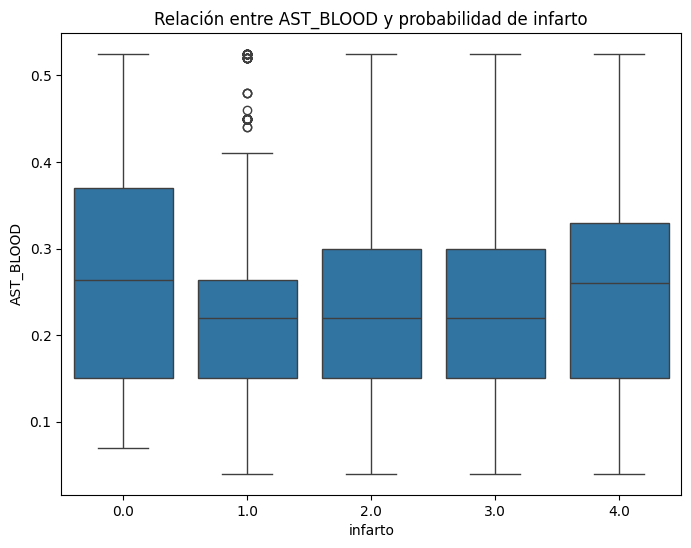

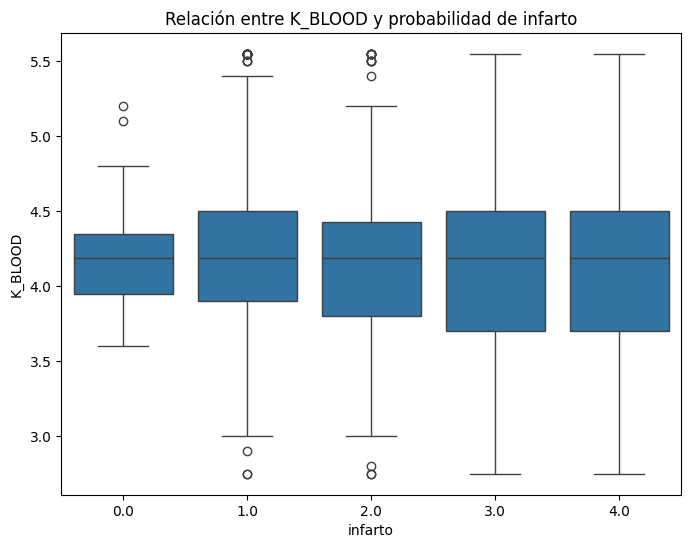

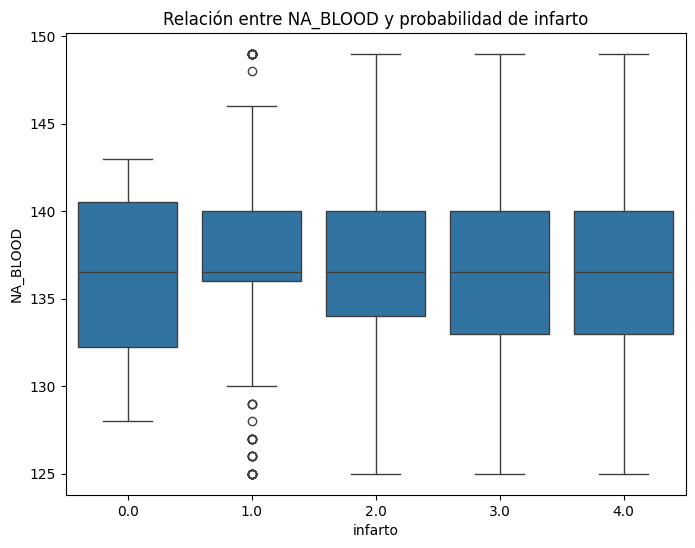

In [11]:
# 7. Análisis de la variable objetivo
# Creamos una nueva columna que indica si el paciente ha tenido algún infarto.
df['infarto'] = df[['ant_im', 'lat_im', 'inf_im', 'post_im']].max(axis=1)

# Seleccionar variables de sangre y analizar su relación con los infartos
blood_vars = ['ALT_BLOOD', 'AST_BLOOD', 'K_BLOOD', 'NA_BLOOD']
for var in blood_vars:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='infarto', y=var, data=df)
    plt.title(f'Relación entre {var} y probabilidad de infarto')
    plt.show()

In [37]:
# Crear una nueva columna que indica si el paciente ha tenido una recaída tras el tratamiento
df['recaida'] = df[['ant_im', 'lat_im', 'inf_im', 'post_im']].sum(axis=1) > 1  # Más de un infarto indica recaída

# Variables de tratamiento
treatment_vars = ['fibr_ter_01', 'fibr_ter_02', 'fibr_ter_03', 'fibr_ter_05', 'fibr_ter_06', 'fibr_ter_07', 'fibr_ter_08']

# Para cada tratamiento, calcular el porcentaje de recaídas y curas
for treatment in treatment_vars:
    treated_patients = df[df[treatment] == 1]  # Pacientes que recibieron el tratamiento
    total = len(treated_patients)
    recaidas = treated_patients['recaida'].sum()
    curas = total - recaidas
    if total > 0:
        print(f"Tratamiento {treatment}:")
        print(f"  Total de pacientes: {total}")
        print(f"  Recaídas: {recaidas} ({(recaidas / total) * 100:.2f}%)")
        print(f"  Curas: {curas} ({(curas / total) * 100:.2f}%)")
        print()

Tratamiento fibr_ter_01:
  Total de pacientes: 13
  Recaídas: 12 (92.31%)
  Curas: 1 (7.69%)

Tratamiento fibr_ter_02:
  Total de pacientes: 16
  Recaídas: 14 (87.50%)
  Curas: 2 (12.50%)

Tratamiento fibr_ter_03:
  Total de pacientes: 68
  Recaídas: 61 (89.71%)
  Curas: 7 (10.29%)

Tratamiento fibr_ter_05:
  Total de pacientes: 4
  Recaídas: 4 (100.00%)
  Curas: 0 (0.00%)

Tratamiento fibr_ter_06:
  Total de pacientes: 9
  Recaídas: 8 (88.89%)
  Curas: 1 (11.11%)

Tratamiento fibr_ter_07:
  Total de pacientes: 6
  Recaídas: 5 (83.33%)
  Curas: 1 (16.67%)

Tratamiento fibr_ter_08:
  Total de pacientes: 2
  Recaídas: 2 (100.00%)
  Curas: 0 (0.00%)



## 8. Estandarizacion

In [44]:
# Crear una instancia de StandardScaler
scaler = StandardScaler()

# Seleccionar solo las columnas numéricas para estandarizar
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Aplicar la estandarización
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Mostrar las primeras filas del DataFrame estandarizado
print(df.head())

        AGE       SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL  \
0  1.350024  0.772168  1.730224  -0.482604  -0.232308  1.047606       NaN   
1 -0.612072  0.772168  0.534054  -0.894465  -1.202636 -1.448785 -0.774597   
2 -0.879631  0.772168 -0.662115  -0.894465  -1.202636  1.047606       NaN   
3  0.547348 -1.295054 -0.662115  -0.894465  -1.202636  1.047606       NaN   
4 -0.166141  0.772168 -0.662115  -0.894465  -1.202636  1.047606       NaN   

         GB  SIM_GIPERT   DLIT_AG  ...  A_V_BLOK  OTEK_LANC    RAZRIV  \
0  1.475882    -0.18626  1.181497  ...  -0.18626  -0.321216 -0.181126   
1 -1.285306    -0.18626 -1.078333  ...  -0.18626  -0.321216 -0.181126   
2  0.555486    -0.18626 -0.432667  ...  -0.18626  -0.321216 -0.181126   
3  0.555486    -0.18626 -0.109834  ...  -0.18626  -0.321216 -0.181126   
4  1.475882    -0.18626  1.181497  ...  -0.18626  -0.321216 -0.181126   

   DRESSLER       ZSN    REC_IM  P_IM_STEN    LET_IS   infarto  recaida  
0 -0.214834 -0.549258 -0

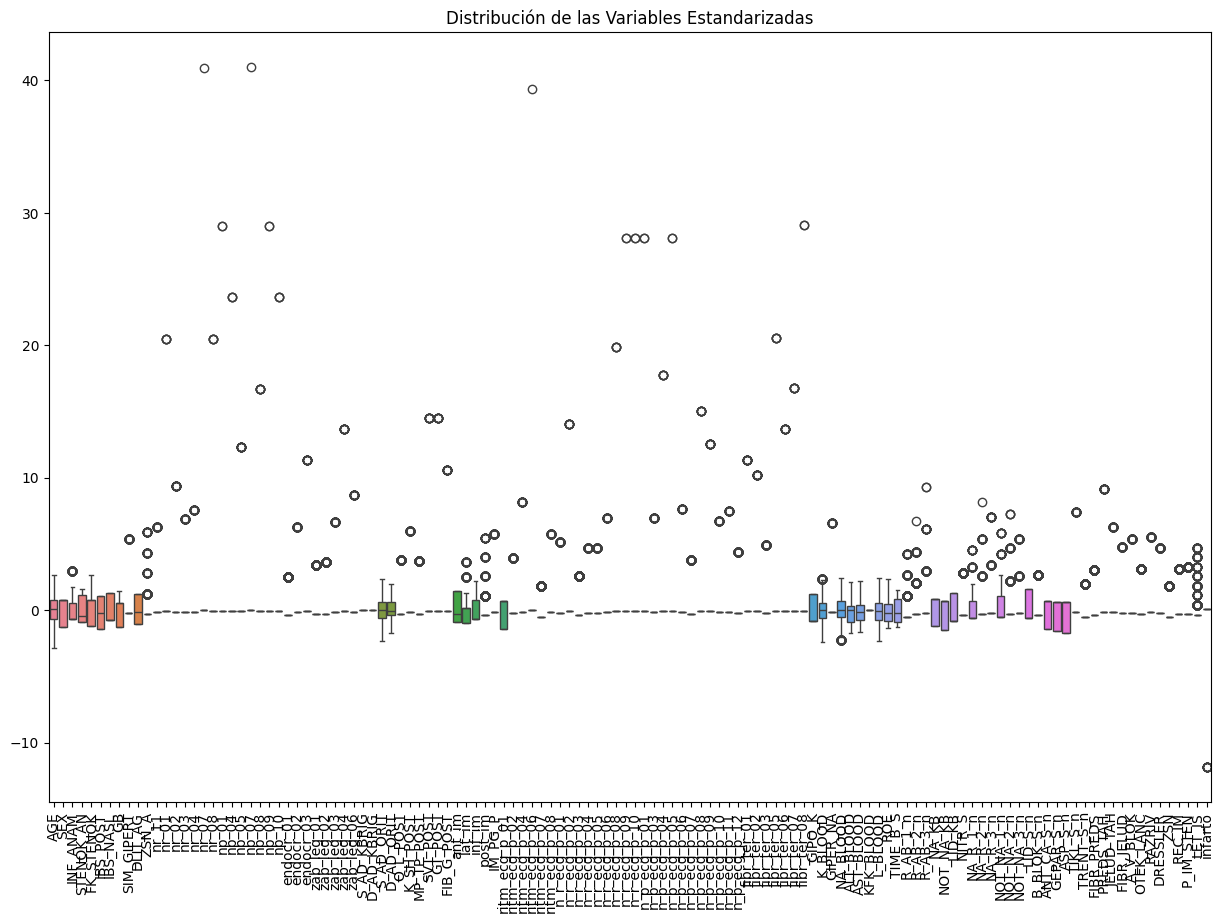

In [45]:
# Gráfico de caja para visualizar la estandarización de las variables
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numeric_columns])
plt.xticks(rotation=90)
plt.title('Distribución de las Variables Estandarizadas')
plt.show()

## 9.0 Normalizacion

In [48]:
# Crear una instancia de MinMaxScaler
min_max_scaler = MinMaxScaler()

# Seleccionar solo las columnas numéricas para normalizar
numeric_columns = df.select_dtypes(include=[np.number]).columns

# Aplicar la normalización
df[numeric_columns] = min_max_scaler.fit_transform(df[numeric_columns])

# Mostrar las primeras filas del DataFrame normalizado
print(df.head())

        AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL  \
0  0.758065  1.0  0.666667   0.166667       0.25       1.0       NaN   
1  0.403226  1.0  0.333333   0.000000       0.00       0.0       0.0   
2  0.354839  1.0  0.000000   0.000000       0.00       1.0       NaN   
3  0.612903  0.0  0.000000   0.000000       0.00       1.0       NaN   
4  0.483871  1.0  0.000000   0.000000       0.00       1.0       NaN   

         GB  SIM_GIPERT   DLIT_AG  ...  A_V_BLOK  OTEK_LANC  RAZRIV  DRESSLER  \
0  1.000000         0.0  1.000000  ...       0.0        0.0     0.0       0.0   
1  0.000000         0.0  0.000000  ...       0.0        0.0     0.0       0.0   
2  0.666667         0.0  0.285714  ...       0.0        0.0     0.0       0.0   
3  0.666667         0.0  0.428571  ...       0.0        0.0     0.0       0.0   
4  1.000000         0.0  1.000000  ...       0.0        0.0     0.0       0.0   

   ZSN  REC_IM  P_IM_STEN  LET_IS  infarto  recaida  
0  0.0     0.0        0.0 

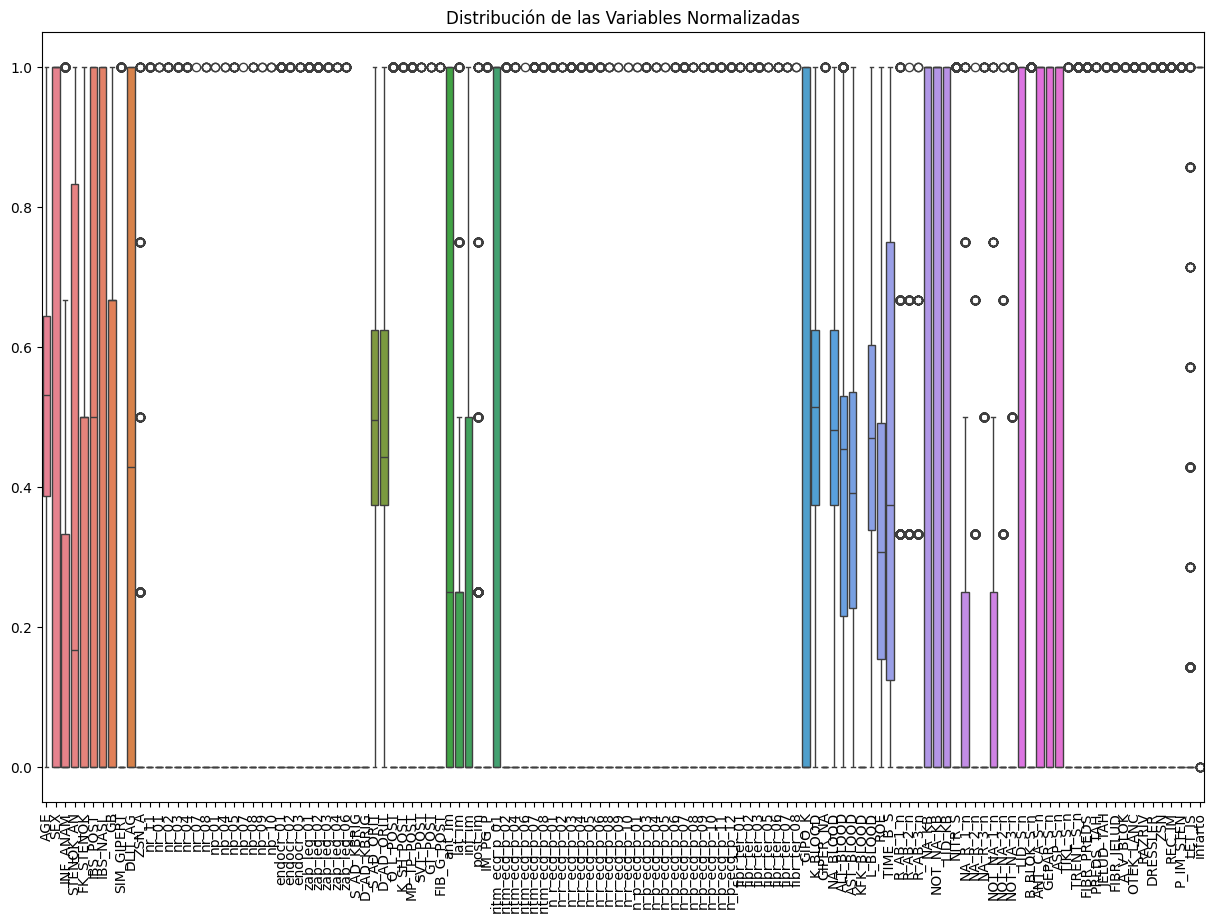

In [52]:
# Gráfico de caja para visualizar la normalización de las variables
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[numeric_columns])
plt.xticks(rotation=90)
plt.title('Distribución de las Variables Normalizadas')
plt.show()